<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/AutoEncoderForAnomaly(day23).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df=pd.read_csv('/content/creditcard.csv')

In [3]:
df = df.dropna()

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
features = df.drop(columns=['Time', 'Class'])
target = df['Class']

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42)
X_train_normal = X_train[y_train == 0]
X_test_normal = X_test[y_test == 0]
X_test_fraud = X_test[y_test == 1]

In [7]:
input_dim = X_train_normal.shape[1]
encoding_dim = 14

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test_normal, X_test_normal)
)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 1.2453 - val_loss: 1.3323
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1824 - val_loss: 1.2957
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1789 - val_loss: 1.2610
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1636 - val_loss: 1.2274
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0231 - val_loss: 1.1965
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0809 - val_loss: 1.1678
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0433 - val_loss: 1.1415
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9623 - val_loss: 1.1176
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9835 - val_loss: 1.0961
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9482 - val_loss: 1.0770
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9197 - val_loss: 1.0599
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9259 - val_l

In [10]:
import numpy as np

reconstructed = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [11]:
threshold = np.percentile(mse, 95)
predictions = (mse > threshold).astype(int)

In [12]:
y_test = y_test.fillna(0)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1194
         1.0       0.02      1.00      0.03         1

    accuracy                           0.95      1195
   macro avg       0.51      0.98      0.50      1195
weighted avg       1.00      0.95      0.97      1195



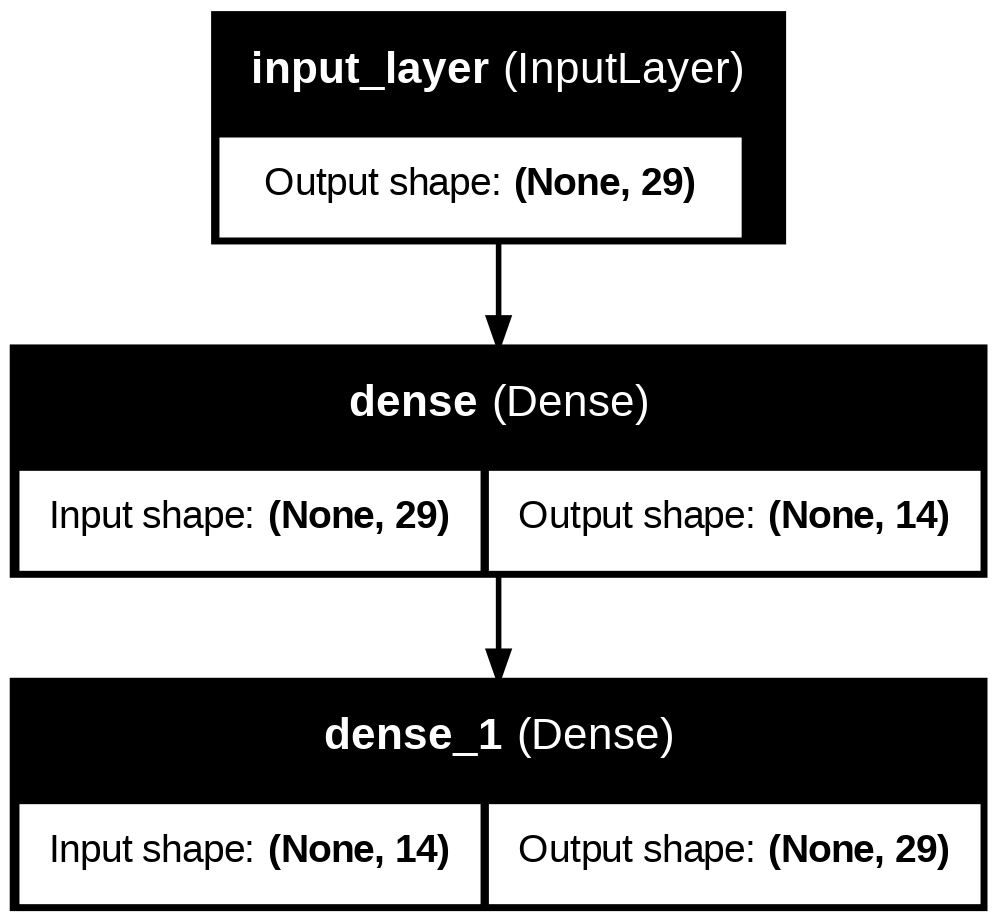

In [20]:
from IPython.display import Image
Image('/content/autoencoder_model.png')


In [ ]:
|